<a href="https://colab.research.google.com/github/cafechungkhoan/chu_gia/blob/master/shb_report_22082021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**: 
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

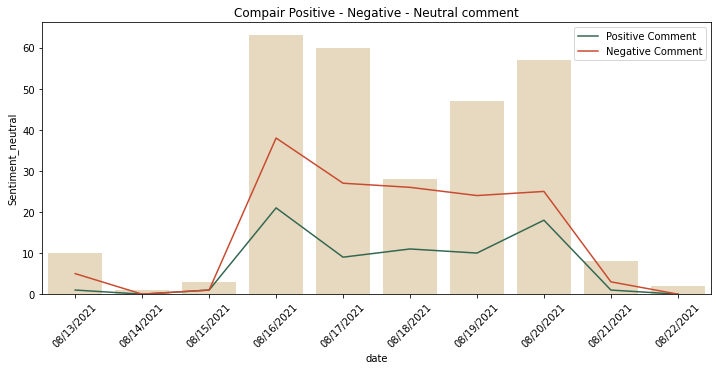

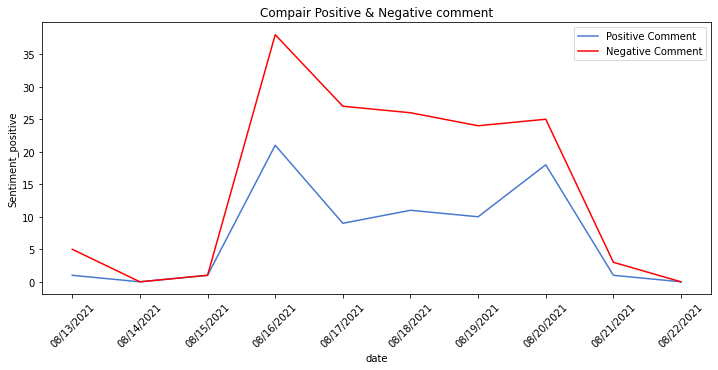

Text(0.5, 1.0, 'Topic Tin đồn')

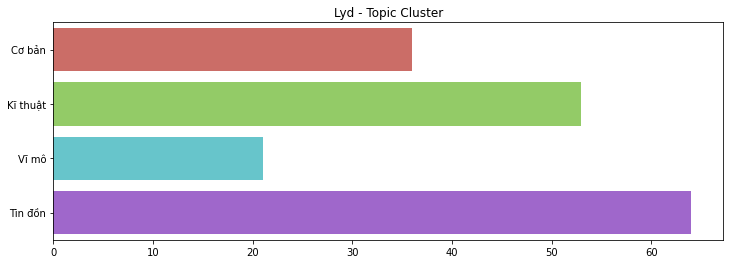

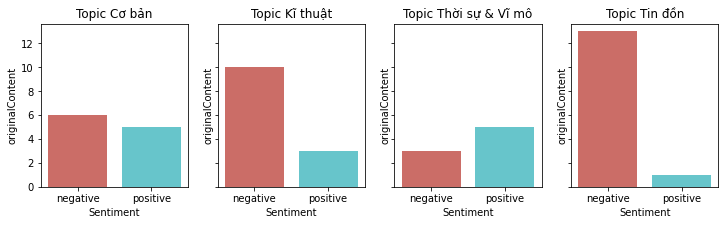

## **Text Summarization using BERT**

In [ ]:
#@title Text Summarize Result { vertical-output: true }
tin_don = pd.DataFrame(tin_don)
for i in tin_don['originalContent']:
    result = model(i, min_length = 1)
    full = ''.join(result)
    print('>>>',full)

>>> Rất rất nhiều bạn hỏi mình cổ phiếu Bank còn giữ được không. Bank cũng vậy. 3. Đợt vừa rồi, rất nhiều CP Bank phát hành tăng vốn, in hàng tỷ tấn giấy tận dụng việc thị trường đang trong giai đoạn cao trào nhất hiện tại game đã xong xuôi, ai về nhà nấy. Coi chừng ! Chúng ta hay bị nhầm lẫn giữa đầu tư + Đầu cơ. 5. Chúng ta Đang được sống trong 1 Uptrend vĩ đại, dòng tiền đang ủng hộ. lãi suất cho vay hạ liên tục. Tránh tập trung sa đà vào những dòng thị trường.
>>> Tặng các bạn F0, tặng các bạn thường theo dõi TK mình và các bạn ham tìm hiểu về kỹ năng cơ bản đầu tư ck . ( thứ 7. Có thể trong việc đầu tư ck , sau nhiều năm thua thiệt , sự cọ sát khiến mình trở nên máu lạnh và bất khuất trước mọi thứ Tin đồn nhảm , thì đứng trước sự lo lắng của người lao động đang phải xoay từng thùng Mỳ tôm , mình lại cảm thấy dễ mềm lòng và không muốn trách móc bất cứ ai . Sở dĩ có bài viết trấn an này là vì cuối tuần mà còn nhiều F0s lo nghĩ nhiều và hỏi có nên bán ngay mọi thứ các bạn có ngày đầu

In [ ]:
#@title Text Summarize: tin_don
tin_don['Text Summarize'] = None
for i in range(len(tin_don['originalContent'])-1):
    result = model(tin_don['originalContent'][i], min_length = 1)
    full = ''.join(result)
    tin_don['Text Summarize'][i] = full
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows',1000)

index  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text Summarize
0   0      ...  Rất rất nhiều bạn hỏi mình cổ phiếu Bank còn giữ được không. Bank cũng vậy. 3. Đợt vừa rồi, rất nhiều CP Bank phát hành tăng vốn, in hàng tỷ tấn giấy tận dụng việc thị trường đang trong giai đoạn cao trào nhất hiện tại game đã xong xuôi, ai về nhà nấy. Coi chừng ! Chúng ta hay bị nhầm lẫn giữa đầu tư + Đầu cơ. 5. Chúng ta Đang được sống trong 1 Uptrend vĩ đại, dòng tiền đang ủng hộ. lãi suất cho vay hạ liên tục. Tránh tập trung sa đà vào những dòng thị trường.                                                                                                                                                                                                                                                                                                                                                                                                                    
1   2      ...  Tặng các bạn F0, tặng các bạn thường theo dõi TK mình và các bạn ham tìm hiểu về kỹ năng cơ bản đầu tư ck . ( thứ 7. Có thể trong việc đầu tư ck , sau nhiều năm thua thiệt , sự cọ sát khiến mình trở nên máu lạnh và bất khuất trước mọi thứ Tin đồn nhảm , thì đứng trước sự lo lắng của người lao động đang phải xoay từng thùng Mỳ tôm , mình lại cảm thấy dễ mềm lòng và không muốn trách móc bất cứ ai . Sở dĩ có bài viết trấn an này là vì cuối tuần mà còn nhiều F0s lo nghĩ nhiều và hỏi có nên bán ngay mọi thứ các bạn có ngày đầu tuần ? Bạn gặp được người Thiện thì ít , gặp thứ tào lao chửi bới thì nhiều . Không nên vội vã GD fomo cả 2 chiều Mua bán . -Mong các bạn bình tĩnh nhiều hơn khi GD . Đó là mục đích của mình dành tặng các bạn . —Nếu bạn quan tâm thứ 2 tôi làm gì sau khi tâm sự với bạn ? - giữ mã Chứng khoẻ , trung bình cái yếu.( Có sai gì thì bỏ quá nhé .
2   20     ...  SHB đánh như kiểu đang phân phối hàng v á. Hôm nay khớp lệnh thỏa thuận 10tr cp.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3   98     ...  Xả vô đầu bố con nhà lái lợn thôi nào                                                                                                                                                                                                                                                                                                                                                                                                                           

index  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Text Summarize class 2
0   0      ...  Rất rất nhiều bạn hỏi mình cổ phiếu Bank còn giữ được không. Bank cũng vậy. Đợt vừa rồi, rất nhiều CP Bank phát hành tăng vốn, in hàng tỷ tấn giấy tận dụng việc thị trường đang trong giai đoạn cao trào nhất hiện tại game đã xong xuôi, ai về nhà nấy.                                                                                                                                                                                                                                                                                                                                     
1   2      ...  Tặng các bạn F0, tặng các bạn thường theo dõi TK mình và các bạn ham tìm hiểu về kỹ năng cơ bản đầu tư ck . ( Sở dĩ có bài viết trấn an này là vì cuối tuần mà còn nhiều F0s lo nghĩ nhiều và hỏi có nên bán ngay mọi thứ các bạn có ngày đầu tuần ? Không nên vội vã GD fomo cả 2 chiều Mua bán .                                                                                                                                                                                                                                                                                            
2   20     ...  SHB đánh như kiểu đang phân phối hàng v á.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3   98     ...  Xả vô đầu bố con nhà lái lợn thôi nào                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
4   109    ...  Bán khống đâu,kê mỗi line 1 triệu cổ để đè giá đi chứ,trong phiên giá thấp nhất bán trăm nghìn cổ,doạ ndt xả bán ngay, không bán lấy đâu ra giá rẻ còn mua vét trả hàng vay mượn,đè mạnh lên không là giá tăng lại bỏ tiền ra mà mua lại đấy,Cố lên :))))))))))))))))))))                                                                                                                                                                                                                                                                                                                     
5   119    ...  SHB cổ đông đông như quân nguyên thì lái nào kéo nổi !                                                                                                                                                                                                                                                                                                                                                                                                    